# **Vector Autoregression**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r'/content/Daily_Electricity_Consumption.csv', parse_dates= True)

In [ ]:
df.shape

(733, 3)

In [ ]:
df.head()

,Date,usage,cost
0,2016-10-22,4.52,0.60
1,2016-10-23,23.32,4.36
2,2016-10-24,7.16,1.20
3,2016-10-25,8.68,1.60
4,2016-10-26,5.04,0.84


In [ ]:
df.columns

Index(['Date', 'usage', 'cost'], dtype='object')

In [ ]:
df.head(10)

,Date,usage,cost
0,2016-10-22,4.52,0.60
1,2016-10-23,23.32,4.36
2,2016-10-24,7.16,1.20
3,2016-10-25,8.68,1.60
4,2016-10-26,5.04,0.84
5,2016-10-27,5.32,0.92
6,2016-10-28,4.64,0.72
7,2016-10-29,10.64,1.96
8,2016-10-30,7.44,1.40
9,2016-10-31,8.84,1.64


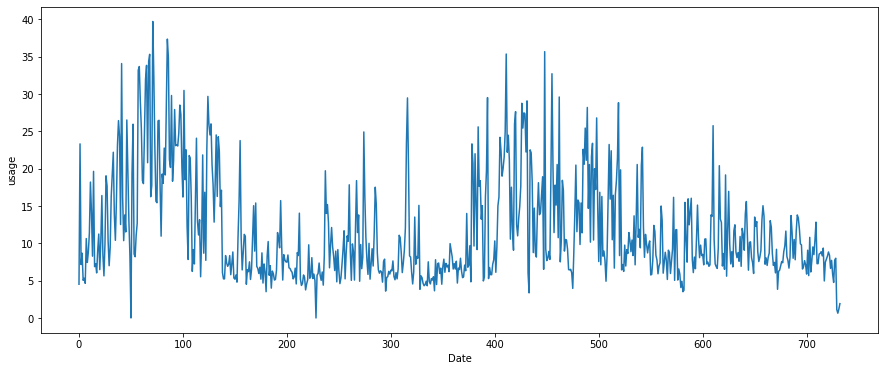

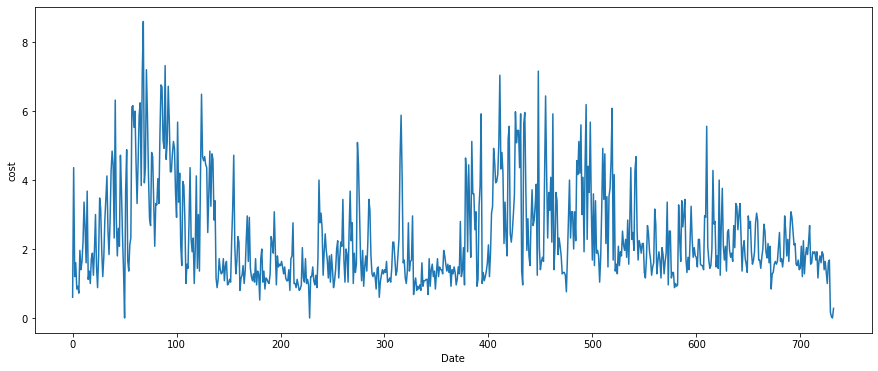

In [ ]:
for c in df[['usage', 'cost']]:
    df[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    # plt.title(f"{str(c)} price of Facebook stocks before stationary")
    plt.show()

The following loop will plot a histogram and KDE for all the columns before making it stationary:

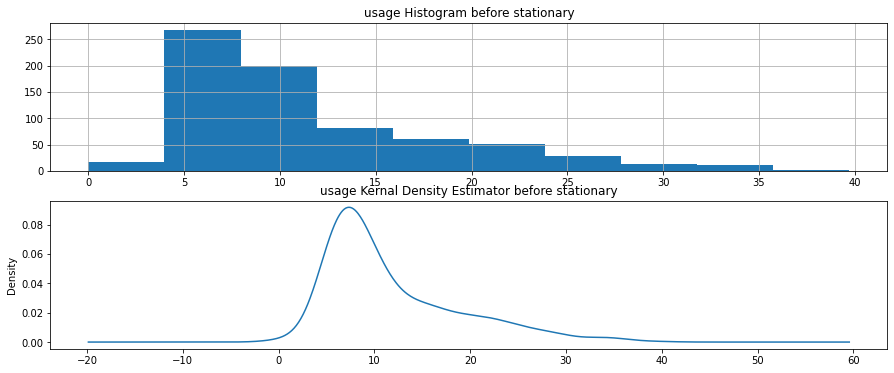

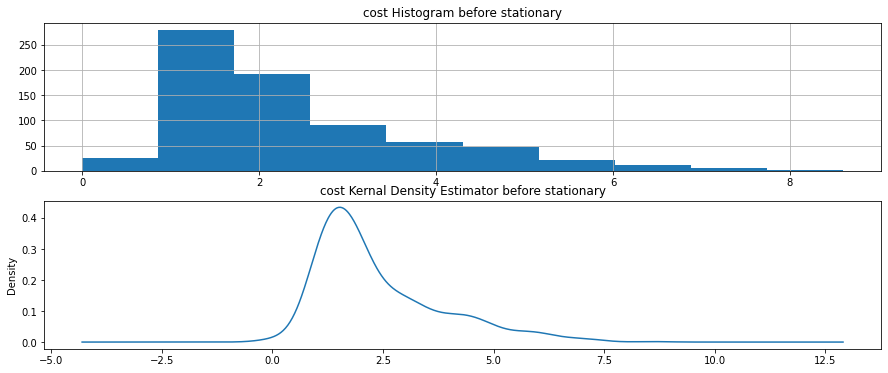

In [ ]:
for c in df[['usage', 'cost']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram before stationary")
    df[str(c)].hist()
    plt.subplot(212)
    df[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator before stationary")
    plt.show()

Define a time-series evaluation function, as shown below:

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

def timeseries_evaluation_metrics_func(y_true, y_pred):
    print('Evaluation metric results:-')
    print(f'MSE is : {mean_squared_error(y_true, y_pred)}') #how close a regression line is to a set of points. 
    print(f'MAE is : {mean_absolute_error(y_true, y_pred)}') # average magnitude of the errors in a set of predictions.
    print(f'RMSE is : {mean_squared_error(y_true, y_pred,squared=False)}') #square root of the avg of squared diff bet pred and actual obs
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}') #statistical measure of how accurate a forecast is.
    print(f'R2 is : {r2_score(y_true, y_pred)}',end='\n\n') #proportion of variance in dependent variable by the independent variable

Here is the ADF test function to check for stationary data:

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

Here is how to check whether the variables are stationary:

In [ ]:
for name, column in df[['usage','cost']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: usage
Test Statistic                  -2.423278
p-value                          0.135274
No Lags Used                    19.000000
Number of Observations Used    713.000000
Critical Value (1%)             -3.439555
Critical Value (5%)             -2.865602
Critical Value (10%)            -2.568933
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: cost
Test Statistic                  -2.631547
p-value                          0.086651
No Lags Used                    19.000000
Number of Observations Used    713.000000
Critical Value (1%)             -3.439555
Critical Value (5%)             -2.865602
Critical Value (10%)            -2.568933
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary




Make a copy of the data, and let’s perform the test train split.
The train will have all the data except the last 30 days, and the test will contain only the last 30 days to evaluate against the predictions.

In [ ]:
X = df[['usage','cost' ]]
train, test = X[0:-30], X[-30:]

Make the data stationary by using Pandas differencing, as shown here:

In [ ]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

Check whether the variables are stationary after first differencing, as 
shown here:

In [ ]:
for name, column in train_diff[['usage','cost']].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: usage
Test Statistic                -1.021928e+01
p-value                        5.377834e-18
No Lags Used                   1.800000e+01
Number of Observations Used    6.830000e+02
Critical Value (1%)           -3.439961e+00
Critical Value (5%)           -2.865781e+00
Critical Value (10%)          -2.569028e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: cost
Test Statistic                -1.045971e+01
p-value                        1.369152e-18
No Lags Used                   1.800000e+01
Number of Observations Used    6.830000e+02
Critical Value (1%)           -3.439961e+00
Critical Value (5%)           -2.865781e+00
Critical Value (10%)          -2.569028e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary




Create the plots after making the data stationary, as shown below:

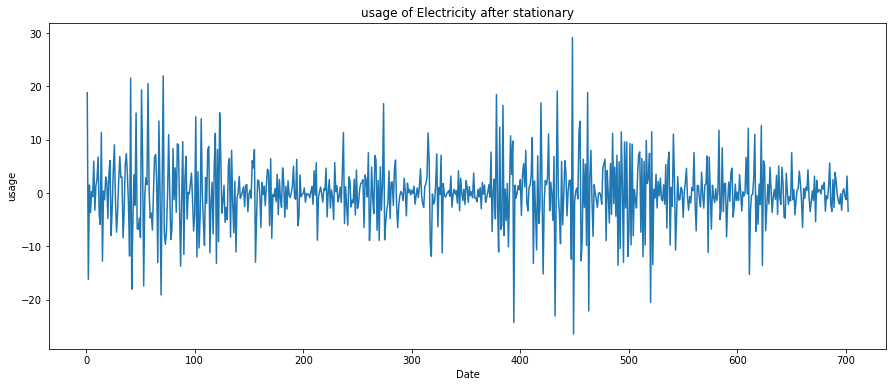

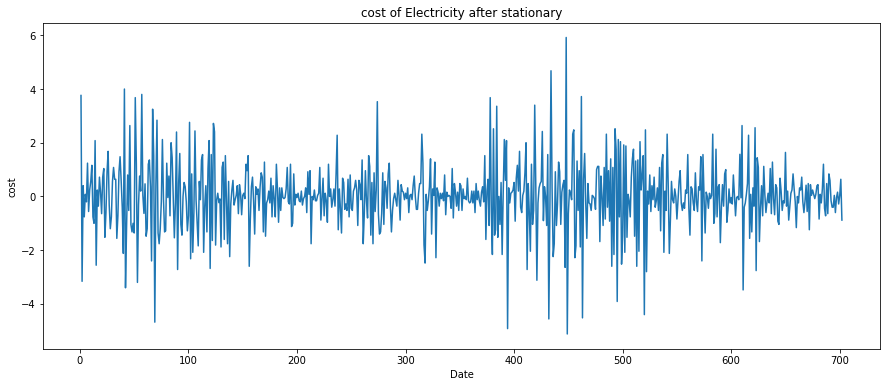

In [ ]:
for c in train_diff[['usage','cost']]:
    train_diff[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} of Electricity after stationary")
    plt.show()

The following loop will plot a histogram and KDE for all the columns 
after making it stationary

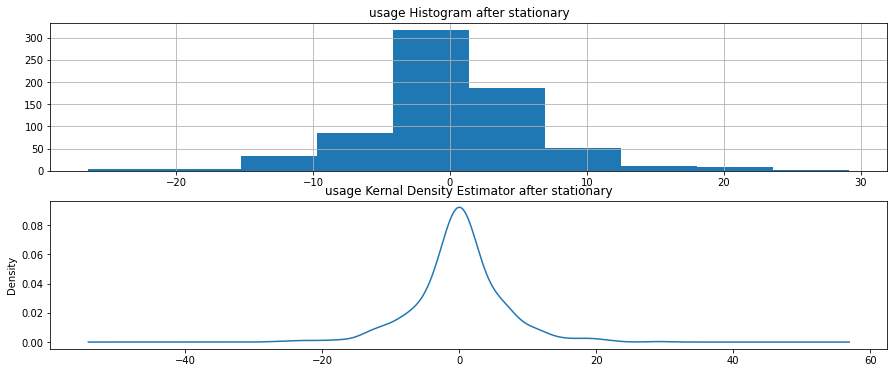

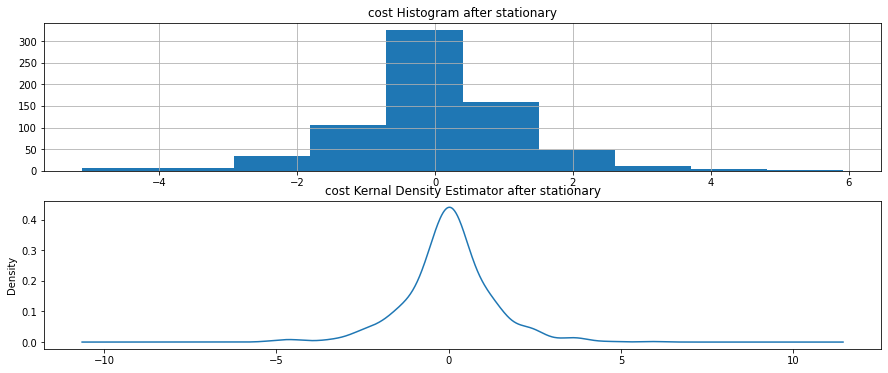

In [ ]:
for c in train_diff[['usage','cost']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram after stationary")
    train_diff[str(c)].hist()
    plt.subplot(212)
    train_diff[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator after stationary")
    plt.show()

In [ ]:
train_diff.head(10)

,usage,cost
1,18.80,3.76
2,-16.16,-3.16
3,1.52,0.40
4,-3.64,-0.76
5,0.28,0.08
6,-0.68,-0.20
7,6.00,1.24
8,-3.20,-0.56
9,1.40,0.24
10,2.60,0.56


A **cointegration test** is the co-movement among underlying variables over the long run. 

**Cointegration analysis** aims to uncover causal relations among variables by determining if the stochastic trends in a group of variables are shared by the series. If these trends are shared, either one variable causes the other or they are both driven by a third variable.

**Two or more variables are cointegrated if and only if they share common trends.**

Correlation is simply a measure of the degree of mutual association between two or more variables.

We can see that the test says that there is the presence of a long-run relationship between features.

**coint_johansen():**

coint_johansen(endog, det_order, k_ar_diff)

**det_order - int**

-1 - no deterministic terms

0 - constant term

1 - linear trend

**k_ar_diffint - nonnegative**

Number of lagged differences in the model.

The second term in the arguments represents the order of null hypothesis. The third term specifies the number of lagged difference terms used when computing the estimator.

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df): 
    res = coint_johansen(df,-1,5) 
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1 # Trace statistics
    cvts = res.cvt[:, d[str(1-0.05)]] #Critical values (90%, 95%, 99%) for trace statistic.
    def adjust(val, length= 6): 
        return str(val).ljust(length) #string left justified (ljust)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


In [ ]:
cointegration_test(train_diff[['usage','cost']])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
usage  >  487.15    > 12.3212   =>   True
cost   >  228.17    > 4.1296    =>   True


Fit the VAR model for the AR term between 1 to 9 and choose the best AR component, as shown here:

In [ ]:
for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(train_diff)
    results = model.fit(i)
    print(f'Order : {i}, AIC:  {results.aic}, BIC: { results.bic}')

Order : 1, AIC:  0.5049961314829546, BIC: 0.5439619621851052
Order : 2, AIC:  0.43971725158711916, BIC: 0.5047326849448821
Order : 3, AIC:  0.3712681669076003, BIC: 0.4623913577391787
Order : 4, AIC:  0.3092961639930226, BIC: 0.42658548182930156
Order : 5, AIC:  0.29128090661505646, BIC: 0.43479493679688075
Order : 6, AIC:  0.26753434738846193, BIC: 0.4373318921710696
Order : 7, AIC:  0.264148898759785, BIC: 0.46028897842445227
Order : 8, AIC:  0.2662569890270659, BIC: 0.48879884300002174
Order : 9, AIC:  0.2723273118723947, BIC: 0.5213303998510618


To make data stationary, we used Pandas differencing after forecasting 
the results. We need to inverse the result to the original scale. As we don’t 
have a Pandas function for this, let’s define a custom function to inverse 
Pandas differencing.

In [ ]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

Autoregressive AR(4) appears to be providing the least Akaike 
Information Criterion (AIC) and Bayesian Information Criterion (BIC), so 
let’s fit and forecast.

AIC and BIC are two ways of scoring a model based on its log 
likelihood and complexity.

In [ ]:
results = model.fit(6)
display(results.summary())
z = results.forecast(y=train_diff[['usage','cost']].values, steps=30)
df_pred = pd.DataFrame(z, columns=['usage','cost'])

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 03, Dec, 2022
Time:                     18:04:08
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.437332
Nobs:                     696.000    HQIC:                  0.333188
Log likelihood:          -2042.26    FPE:                    1.30675
AIC:                     0.267534    Det(Omega_mle):         1.25927
--------------------------------------------------------------------
Results for equation usage
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.002646         0.202459            0.013           0.990
L1.usage        -0.231001         0.196747           -1.174           0.240
L1.cost         -1.536596         0.964354           -1.593           0.111
L2.u

Arrange an index for aligning plots, as shown below:

In [ ]:
df_pred["new_index"] = range(733,763)
df_pred = df_pred.set_index("new_index")

In [ ]:
df_pred

,usage,cost
new_index,,
733,1.098101,0.236337
734,0.892314,0.204857
735,-0.621733,-0.102858
736,-0.521077,-0.126384
737,0.413542,0.108832
738,0.421297,0.094959
739,-0.392262,-0.092308
740,-0.003477,-0.008216
741,0.110895,0.023496


Let’s inverse the differenced prediction, as shown below:

In [ ]:
res = inverse_diff(df[['usage','cost' ]],df_pred)

In [ ]:
res

,usage,cost,usage_1st_inv_diff,cost_1st_inv_diff
new_index,,,,
733,1.098101,0.236337,1.200787,0.435486
734,0.892314,0.204857,2.093101,0.640343
735,-0.621733,-0.102858,1.471368,0.537485
736,-0.521077,-0.126384,0.950292,0.411102
737,0.413542,0.108832,1.363833,0.519934
738,0.421297,0.094959,1.785130,0.614893
739,-0.392262,-0.092308,1.392868,0.522586
740,-0.003477,-0.008216,1.389391,0.514370
741,0.110895,0.023496,1.500285,0.537865


Evaluate the results individually, as shown below:

In [ ]:
for i in ['usage','cost']:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

Evaluation metric for usage
Evaluation metric results:-
MSE is : 41.193378562022694
MAE is : 5.8373097786756825
RMSE is : 6.418206802684274
MAPE is : 0.7702230435345531
R2 is : -4.143981471394703

Evaluation metric for cost
Evaluation metric results:-
MSE is : 1.3997143111746284
MAE is : 1.1015291881529097
RMSE is : 1.1830952248972304
MAPE is : 80950261436429.16
R2 is : -2.4338293596104847



Plot the results, as shown below:

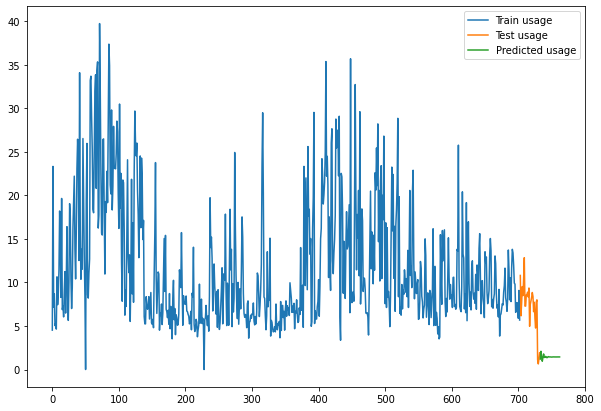

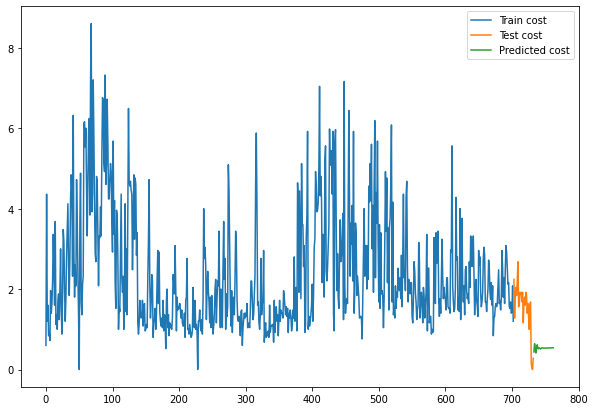

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in ['usage','cost']:
    
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()